# NYC Squirrel Census

[TidyTuesday 2019-10-29](https://github.com/rfordatascience/tidytuesday/tree/master/data/2019/2019-10-29)

**Contents:**

* [Data read](#Data-read)
* [Colors, age, on/above ground](#Colors,-age,-on/above-ground)
* [Sighting locations](#Sighting-locations)
* [Behaviors and other observations](#Behaviors-and-other-observations)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
pd.set_option('display.max_columns', None)

## Data read

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-10-29/nyc_squirrels.csv')
data

,long,lat,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,combination_of_primary_and_highlight_color,color_notes,location,above_ground_sighter_measurement,specific_location,running,chasing,climbing,eating,foraging,other_activities,kuks,quaas,moans,tail_flags,tail_twitches,approaches,indifferent,runs_from,other_interactions,lat_long,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,+,NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,Gray+Cinnamon,NaN,Ground Plane,FALSE,NaN,True,False,False,False,False,NaN,False,False,False,False,False,False,False,True,me,POINT (-73.9570437717691 40.794850940803904),NaN,19,4,19,13
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,NaN,Cinnamon+,NaN,Above Ground,4,NaN,False,False,True,False,False,NaN,False,False,False,False,False,False,True,False,NaN,POINT (-73.9768311751004 40.76671780725581),NaN,19,4,19,13
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,NaN,Gray+,NaN,Above Ground,3,NaN,False,False,True,False,False,NaN,False,False,False,False,False,False,False,True,NaN,POINT (-73.9757249834141 40.7697032606755),NaN,19,4,19,13
4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,10182018,1,NaN,NaN,NaN,+,NaN,Above Ground,NaN,NaN,False,False,False,False,False,unknown,True,False,False,False,False,False,False,False,NaN,POINT (-73.9593126695714 40.797533370163),NaN,19,4,19,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,-73.963943,40.790868,30B-AM-1007-04,30B,AM,10072018,4,Adult,Gray,NaN,Gray+,NaN,Ground Plane,FALSE,NaN,False,False,False,True,True,NaN,False,False,False,False,False,False,False,True,NaN,POINT (-73.9639431360458 40.7908677445466),NaN,19,4,19,13
3019,-73.970402,40.782560,19A-PM-1013-05,19A,PM,10132018,5,Adult,Gray,White,Gray+White,NaN,Ground Plane,FALSE,NaN,False,False,False,False,True,NaN,False,False,False,False,False,False,True,False,NaN,POINT (-73.9704015859639 40.7825600069973),NaN,19,4,19,13
3020,-73.966587,40.783678,22D-PM-1012-07,22D,PM,10122018,7,Adult,Gray,"Black, Cinnamon, White","Gray+Black, Cinnamon, White",NaN,Ground Plane,FALSE,NaN,False,False,False,True,True,NaN,False,False,False,False,False,False,True,False,NaN,POINT (-73.9665871993517 40.7836775064883),NaN,19,4,19,13
3021,-73.963994,40.789915,29B-PM-1010-02,29B,PM,10102018,2,NaN,Gray,"Cinnamon, White","Gray+Cinnamon, White",NaN,Ground Plane,FALSE,NaN,False,False,False,True,False,NaN,False,False,False,False,False,False,True,False,NaN,POINT (-73.9639941227864 40.7899152327912),NaN,19,4,19,13


## Colors, age, on/above ground

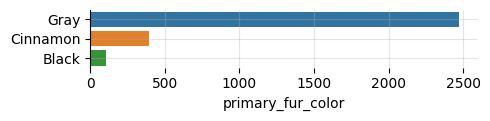

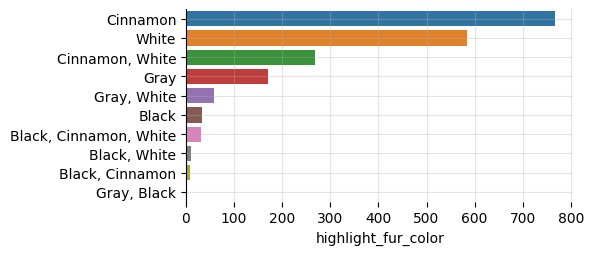

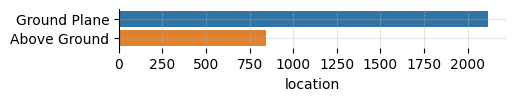

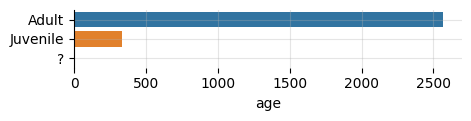

In [4]:
for col in 'primary_fur_color highlight_fur_color location age'.split():
    v = data[col].value_counts().reset_index()
    fig, ax = plt.subplots(figsize=(5,.25*len(v)))
    sns.barplot(col, 'index', data=v, ax=ax)
    ax.spines['bottom'].set_visible(False)
    ax.set(ylabel='')
    ax.grid()

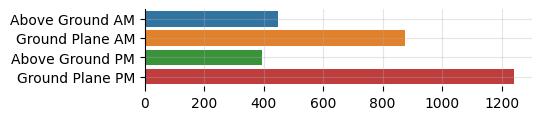

In [5]:
v = data['shift location'.split()].value_counts().reset_index()
v['location_shift'] = v.location + ' ' + v['shift']
fig, ax = plt.subplots(figsize=(5,.25*len(v)))
sns.barplot(0, 'location_shift', data=v.sort_values('shift location'.split()), ax=ax)
ax.spines['bottom'].set_visible(False)
ax.set(xlabel='', ylabel='')
ax.grid()

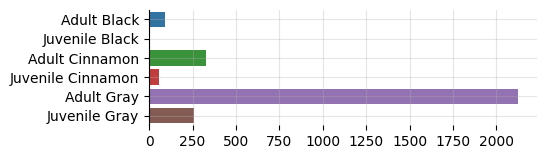

In [6]:
v = data['age primary_fur_color'.split()][data.age.ne('?')].value_counts().reset_index()
v['age_color'] = v.age + ' ' + v.primary_fur_color
fig, ax = plt.subplots(figsize=(5,.25*len(v)))
sns.barplot(0, 'age_color', data=v.sort_values('primary_fur_color age '.split()), ax=ax)
ax.spines['bottom'].set_visible(False)
ax.set(xlabel='', ylabel='')
ax.grid()

## Sighting locations

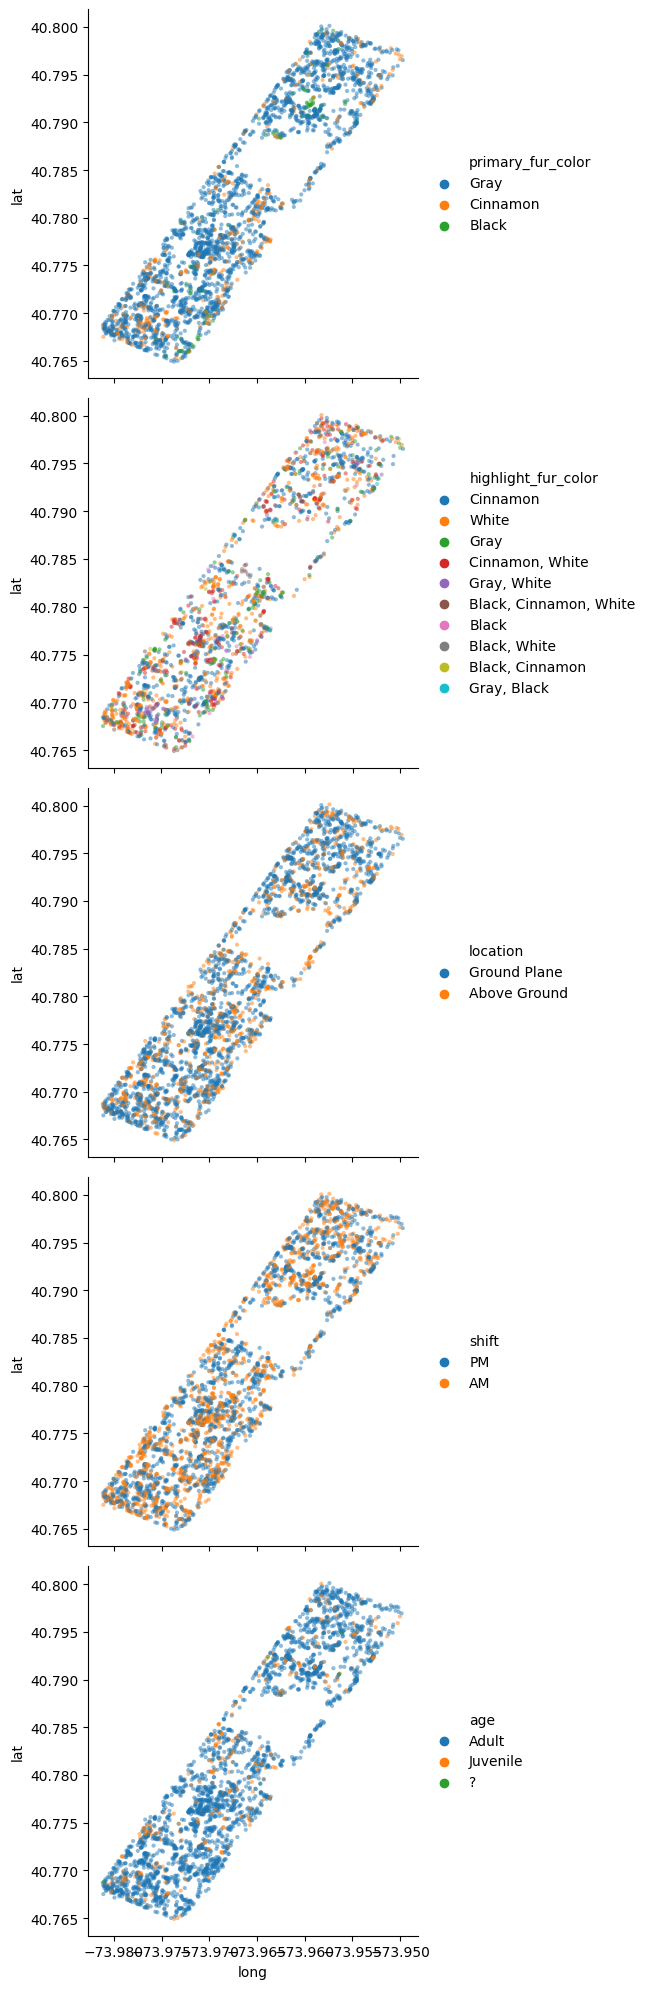

In [7]:
cols = 'primary_fur_color highlight_fur_color location shift age'.split()
fig, axs = plt.subplots(len(cols), figsize=(6,4*len(cols)), sharex=True)
for (ax, col) in zip(axs, cols):
    sns.scatterplot('long', 'lat', hue=col, marker='.', data=data, alpha=.5, edgecolor='none', ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=[1,.5], frameon=False)
    ax.set(aspect='equal')
plt.tight_layout()

In [8]:
data.hectare.value_counts().head(15)

14D    32
32E    30
14E    28
01B    27
07H    26
13D    25
13E    24
33E    22
03D    22
04C    22
03B    21
10G    21
08I    21
30B    21
12F    21
Name: hectare, dtype: int64

## Behaviors and other observations

In [9]:
all_props = dict(
    behaviors = 'running chasing climbing eating foraging'.split(),
    sounds = 'kuks quaas moans'.split(),
    tails = 'tail_flags tail_twitches'.split(),
    friendliness = 'approaches indifferent runs_from'.split(),
)
all_props

{'behaviors': ['running', 'chasing', 'climbing', 'eating', 'foraging'],
 'sounds': ['kuks', 'quaas', 'moans'],
 'tails': ['tail_flags', 'tail_twitches'],
 'friendliness': ['approaches', 'indifferent', 'runs_from']}

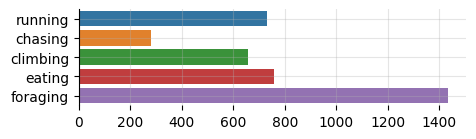

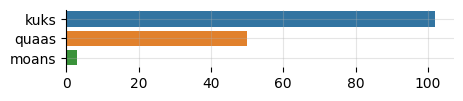

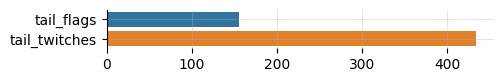

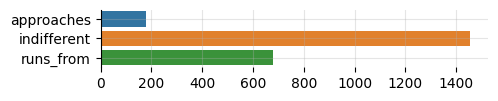

In [10]:
for (prop, detail) in all_props.items():
    d = data[detail].sum().reset_index()
    fig, ax = plt.subplots(figsize=(5,.25*len(d)))
    sns.barplot(0, 'index', data=d, ax=ax)
    ax.spines['bottom'].set_visible(False)
    ax.set(xlabel='', ylabel='')
    ax.grid()

In [11]:
m = smf.ols(f"""
    foraging.astype(int) ~
        C(primary_fur_color) + C(age) + C(location)
        + {' + '.join(all_props['sounds'])}
        + {' + '.join(all_props['tails'])}
        + {' + '.join(all_props['friendliness'])}
    """, data).fit()
display(m.params.iloc[1:].sort_values(ascending=False))
(
    sm.stats.anova_lm(m, typ=2)
    .assign(pct_variation = lambda x: x.sum_sq / x.sum_sq.sum())
    .sort_values('pct_variation', ascending=False)
    .round(4)
)

moans[T.True]                       0.896313
C(location)[T.Ground Plane]         0.421717
indifferent[T.True]                 0.107867
tail_twitches[T.True]               0.075252
C(primary_fur_color)[T.Cinnamon]    0.069344
approaches[T.True]                  0.059127
C(primary_fur_color)[T.Gray]        0.051697
quaas[T.True]                       0.028861
runs_from[T.True]                  -0.022789
kuks[T.True]                       -0.052331
tail_flags[T.True]                 -0.058555
C(age)[T.Adult]                    -0.108732
C(age)[T.Juvenile]                 -0.189280
dtype: float64

,sum_sq,df,F,PR(>F),pct_variation
Residual,581.3003,2810.0,NaN,NaN,0.8429
C(location),96.0800,1.0,464.4498,0.0000,0.1393
indifferent,5.8144,1.0,28.1067,0.0000,0.0084
tail_twitches,1.9798,1.0,9.5701,0.0020,0.0029
C(age),1.8431,2.0,4.4547,0.0117,0.0027
moans,0.8011,1.0,3.8723,0.0492,0.0012
approaches,0.5067,1.0,2.4494,0.1177,0.0007
tail_flags,0.4740,1.0,2.2915,0.1302,0.0007
C(primary_fur_color),0.3804,2.0,0.9194,0.3989,0.0006
kuks,0.2240,1.0,1.0826,0.2982,0.0003
